In [1]:
# In this assignment you will implement one or more algorithms for the traveling
# salesman problem, such as the dynamic programming algorithm covered in the
# video lectures. Here is a data file describing a TSP instance.
# tsp.txt
# The first line indicates the number of cities. Each city is a point in the
# plane, and each subsequent line indicates the x- and y-coordinates of a single
# city.
# The distance between two cities is defined as the Euclidean distance --- that
# is, two cities at locations (x,y)(x,y) and (z,w)(z,w) have distance
# sqrt{(x-z)^2 + (y-w)^2} between them.
# In the box below, type in the minimum cost of a traveling salesman tour for
# this instance, rounded down to the nearest integer.
# OPTIONAL: If you want bigger data sets to play with, check out the TSP
# instances from around the world here. The smallest data set (Western Sahara)
# has 29 cities, and most of the data sets are much bigger than that. What's the
# largest of these data sets that you're able to solve --- using dynamic
# programming or, if you like, a completely different method?
# HINT: You might experiment with ways to reduce the data set size. For example,
# trying plotting the points. Can you infer any structure of the optimal
# solution? Can you use that structure to speed up your algorithm?

In [2]:
import pandas as pd
df = pd.read_csv("D:/Users/Herry/Downloads/tsp.txt")

In [3]:
import numpy as np

file = "D:/Users/Herry/Downloads/tsp.txt"

data = open(file, 'r').readlines()

n = int(data[0])

graph = {}
for i,v in enumerate(data[1:]):
    graph[i] = tuple(map(float, v.strip().split(" ")))
    
dist_val = np.zeros([n,n])
for i in range(n):
    for k in range(n):
        dist_val[i,k] = dist_val[k,i] = np.sqrt((graph[k][0]-graph[i][0])**2 + (graph[k][1]-graph[i][1])**2)

print (graph)

{0: (20833.3333, 17100.0), 1: (20900.0, 17066.6667), 2: (21300.0, 13016.6667), 3: (21600.0, 14150.0), 4: (21600.0, 14966.6667), 5: (21600.0, 16500.0), 6: (22183.3333, 13133.3333), 7: (22583.3333, 14300.0), 8: (22683.3333, 12716.6667), 9: (23616.6667, 15866.6667), 10: (23700.0, 15933.3333), 11: (23883.3333, 14533.3333), 12: (24166.6667, 13250.0), 13: (25149.1667, 12365.8333), 14: (26133.3333, 14500.0), 15: (26150.0, 10550.0), 16: (26283.3333, 12766.6667), 17: (26433.3333, 13433.3333), 18: (26550.0, 13850.0), 19: (26733.3333, 11683.3333), 20: (27026.1111, 13051.9444), 21: (27096.1111, 13415.8333), 22: (27153.6111, 13203.3333), 23: (27166.6667, 9833.3333), 24: (27233.3333, 10450.0)}


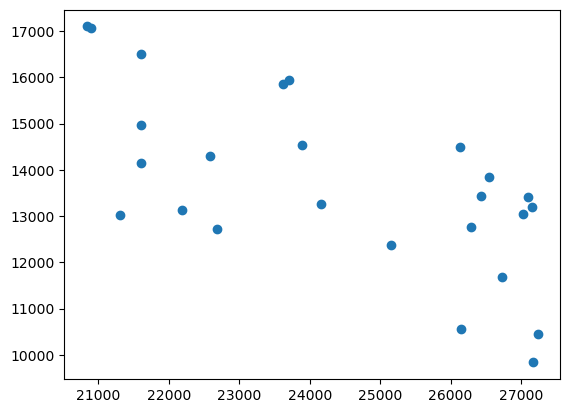

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

values = list(graph.values())
y = [values[i][0] for i in range(len(values))]
x = [values[i][1] for i in range(len(values))]

plt.scatter(y,x)
plt.show()

In [5]:
import collections

    
def to_key(a):
    
    my_str = ""
    
    for i in a:
        my_str += str(int(i))
    return my_str
                      
def to_subset(v, n):
    a = np.zeros(n)
    a[v] = 1
    
    return a

def create_all_subset(n):
    A = collections.defaultdict(dict)
    
    for m in range(1,n):
        for a in (itertools.combinations(range(n), m)):
            key = a + tuple([0 for i in range(n-m)])
            print (a, tuple([0 for i in range(n-m)]), key, m, n)
            for j in range(n):
                A[to_key(key)][j] = np.inf
        
    A[to_key(to_subset(0,n))][0] = 0
      
    return A
# res= to_subset([2,3],5)
# print (res)

# print (to_key(res))
# A = create_all_subset(3)
# print (A)
# print (index_to_set(10,'25'))
# print(set_to_index([1,3]))

In [6]:
import itertools

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(1,len(s)+1))

def index_to_set(index, n='8'):
    
    fmt = '{0:0'+n+'b}'
    res = fmt.format(index)
    
    mylist = list(res)    
    mylist.reverse()
    
    print (res)
    
    mylist = np.asarray(mylist, dtype=int)
    
    ret = np.where(mylist==1)
    
#     ret = []
#     for i, j in enumerate(mylist):
#         if j=="1":
#             ret.append(i)
            
    return list(ret[0])
    
def set_to_index(my_set):
    # i = [1, 5, 7]
    
    ret = 0
    for i in my_set:
        ret += 2**i
        
    return ret

print ("~~ Test")
# print (set_to_index([1]))
# print (index_to_set(set_to_index([1])))

ex_all_sets = powerset(range(5))
for s in ex_all_sets:
    print ("~~ Original set:", s)
    print ("index:", set_to_index(s))
    print ("recovered set:", index_to_set(set_to_index(s),'5'))

~~ Test
~~ Original set: (0,)
index: 1
00001
recovered set: [0]
~~ Original set: (1,)
index: 2
00010
recovered set: [1]
~~ Original set: (2,)
index: 4
00100
recovered set: [2]
~~ Original set: (3,)
index: 8
01000
recovered set: [3]
~~ Original set: (4,)
index: 16
10000
recovered set: [4]
~~ Original set: (0, 1)
index: 3
00011
recovered set: [0, 1]
~~ Original set: (0, 2)
index: 5
00101
recovered set: [0, 2]
~~ Original set: (0, 3)
index: 9
01001
recovered set: [0, 3]
~~ Original set: (0, 4)
index: 17
10001
recovered set: [0, 4]
~~ Original set: (1, 2)
index: 6
00110
recovered set: [1, 2]
~~ Original set: (1, 3)
index: 10
01010
recovered set: [1, 3]
~~ Original set: (1, 4)
index: 18
10010
recovered set: [1, 4]
~~ Original set: (2, 3)
index: 12
01100
recovered set: [2, 3]
~~ Original set: (2, 4)
index: 20
10100
recovered set: [2, 4]
~~ Original set: (3, 4)
index: 24
11000
recovered set: [3, 4]
~~ Original set: (0, 1, 2)
index: 7
00111
recovered set: [0, 1, 2]
~~ Original set: (0, 1, 3)
i

In [7]:
A = np.full([2**n, n], np.inf)
A[set_to_index([0]),0]=0
for i in range(0, n):
    A[set_to_index([i]),i] = dist_val[i,0]
    print (set_to_index([i]), dist_val[i,0])

1 0.0
2 74.53561415712697
4 4109.913459889123
8 3047.9957068357057
16 2266.911731360042
32 973.5388173508504
64 4190.100799370928
128 3301.893396219811
256 4757.742197606854
512 3044.3481805543315
1024 3094.978054490498
2048 3986.2611491081325
4096 5092.505430095836
8192 6406.149567403533
16384 5903.388857258176
32768 8436.198480292465
65536 6962.778000833352
131072 6693.612230245258
262144 6575.92412964816
524288 8009.386876589799
1048576 7398.462747143098
2097152 7266.0491359171065
4194304 7424.952716351918
8388608 9639.271595117782
16777216 9229.436602523472


In [8]:
from tqdm import tqdm

def _dist(k, j):
    return np.sqrt((graph[k][0]-graph[j][0])**2 + (graph[k][1]-graph[j][1])**2)
    
FULL = range(n)

for m in range(1,n):
#     all_sets = powerset(range(1,m))
    all_sets = itertools.combinations(FULL, m+1)

    print ("Subset Size:",m)

    for _set in all_sets:
        
        if not _set:
            continue
            
        _set = list(_set)
#         print ("Len Set", len(_set))
        set2_idx = set_to_index(_set)
        
        for j in _set:
            _set2 = _set.copy()            
            _set2.remove(j)
            
            if j==0 or not _set2:
                continue            
#             print ("_set2", _set2)
            _set2_idx = set_to_index(_set2)
    
#             print ("handle Set", _set2, "idx",_set2_idx, "j:", j)
            minval = np.inf         
            for k in _set2:
#                 print ("idxSet:", _set2_idx, "k:", k, "dist", A[_set2_idx,k])
                val = A[_set2_idx,k] + dist_val[k,j]
                if val < minval:
                    minval = val
#             print ("minval",minval)
            A[set2_idx,j] = minval

# print (A)

Subset Size: 1
Subset Size: 2
Subset Size: 3
Subset Size: 4
Subset Size: 5
Subset Size: 6
Subset Size: 7
Subset Size: 8
Subset Size: 9
Subset Size: 10
Subset Size: 11
Subset Size: 12
Subset Size: 13
Subset Size: 14
Subset Size: 15
Subset Size: 16
Subset Size: 17
Subset Size: 18
Subset Size: 19
Subset Size: 20
Subset Size: 21
Subset Size: 22
Subset Size: 23
Subset Size: 24


In [9]:
my_set = [i for i in range(n)]

print ("Full Set", my_set, set_to_index(my_set))

minval = np.inf 
for j in range(1,n):
    val = A[set_to_index(my_set),j] + dist_val[j,0]
    if val < minval:
        minval = val
        
print ("minval", minval)
       
# print (A[set_to_index(my_set),:])

Full Set [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24] 33554431
minval 26442.73030895475
